# Supervised Learning: Regression
Shanshan Wang  
shanshan.wang@uni-due.de  
Feb.16, 2021

## Contents
Main objective of the analysis that specifies whether our regression models will be focused on prediction or interpretation.

<div class="alert alert-block alert-info" style="margin-top: 20px">

<ol>
<li>  <a href="#data">Data Exploration</a>
    <ul>
    <li>Reading datasets
    <li>Brief description of the dataset and a summary of its attributes
    <li>Data cleaning and feature engineering
    </ul>
    <br>
<li><a href="#model">Models</a>
    <ul>
    <li>Model 1: a simple linear regression
    <li>Model 2: a polynomial regression
    <li>Model 3: a LASSO regression
    <li>Model 4: a Ridge regression
    <li>Model 5: an Elastic Net regression
    </ul>
    <br>
<li><a href="#results">Results and Discussion</a>
<li><a href="#summary">Summary</a> 
<li><a href="#suggestion">Suggestions for next steps in analyzing this data
</ol>
    
</div>




## 1 Data Exploration <a name="data"></a>

### Reading datasets <a name="reading"></a>
#### Load NASDAQ-100 company symbols from Wikipedia

In [1]:
import pandas as pd
import numpy as np

In [2]:
URL = "https://en.wikipedia.org/wiki/NASDAQ-100#Changes_in_2020"
tables = pd.read_html(URL)
df_NASDAQ100=tables[3]
df_NASDAQ100.head(10)

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,Advanced Micro Devices,AMD,Information Technology,Semiconductors
3,Alexion Pharmaceuticals,ALXN,Health Care,Pharmaceuticals
4,Align Technology,ALGN,Health Care,Health Care Supplies
5,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
6,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
7,Amazon.com,AMZN,Consumer Discretionary,Internet & Direct Marketing Retail
8,American Electric Power,AEP,Utilities,Electric Utilities
9,Amgen,AMGN,Health Care,Biotechnology


In [3]:
! pip install yahoofinancials

#### Load price data of stocks by YahooFinancials

In [4]:
from yahoofinancials import YahooFinancials

In [5]:
assets = df_NASDAQ100['Ticker']
yahoo_financials = YahooFinancials(assets)
data = yahoo_financials.get_historical_price_data(start_date='2010-01-01', 
                                                  end_date='2020-12-31', 
                                                  time_interval='daily')
prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

In [6]:
prices_df.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
2010-01-04,10.126624,37.090000,9.70,24.125000,18.50,313.688690,312.204773,133.899994,22.445042,45.675011,...,19.632912,18.125000,21.007998,29.455685,44.240002,28.596109,NaN,14.271184,19.830650,NaN
2010-01-05,10.144546,37.700001,9.71,23.780001,18.01,312.307312,310.829926,134.690002,22.188086,45.279354,...,19.519688,19.137501,21.228777,29.653036,42.779999,28.366116,NaN,14.101936,19.580618,NaN
2010-01-06,10.090778,37.619999,9.57,23.840000,17.48,304.434448,302.994293,132.250000,22.412928,44.939075,...,19.376272,18.732500,20.999506,30.037886,42.029999,28.151457,NaN,14.129019,19.447794,NaN
2010-01-07,9.848815,36.889999,9.47,23.930000,17.43,297.347351,295.940735,130.000000,22.605635,44.527592,...,19.436659,18.277500,20.710794,29.988546,41.500000,28.320110,NaN,14.068089,19.252451,NaN
2010-01-08,9.768159,36.689999,9.43,23.975000,17.66,301.311310,299.885956,133.520004,22.875437,44.923252,...,19.882002,18.195000,20.872135,29.603697,40.669998,28.358456,NaN,14.074859,19.533739,NaN


In [7]:
prices_df.shape

(2768, 102)

### Brief description of the data set and a summary of its attributes <a name="describe"></a>

The dataset contains adjusted prices of 102 stocks during 2768 days from Jan. 4, 2010 to Dec. 30, 2020. The 102 stocks are from NASDAQ-100 index. Their company names are listed in Wikipedia and updated on December 21, 2020. The companies added to NASDAQ-100 index latest may not have the data in early time. Therefore, we find some of the stocks in the dataset contain the missing data.

A row in the dataset represents the data from all stocks in one trading day and a column indicates a time series of a stock. The dataset lists the stock prices in the data type of float64, where 19 of 102 stocks contain missing data. We list a description of the dataset, such as the mean values, standard deviation, minimum value and maximum value, for different stocks in the following table. 

In [8]:
prices_df.describe()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,...,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2067.000000,2768.000000,2768.000000,430.000000
mean,34.055565,132.808602,14.538689,112.321461,119.313551,727.292646,720.068428,858.503042,49.947370,123.477973,...,59.620197,29.898676,89.148752,80.471279,111.694823,50.815367,112.863445,33.979156,52.293613,186.974500
std,23.239323,122.360323,18.829283,42.928740,114.930393,396.807923,396.395423,815.563986,20.817222,58.497141,...,37.405091,12.768260,60.077680,43.077067,66.203490,18.036453,48.479947,15.859582,29.071420,142.661358
min,8.970576,22.690001,1.620000,22.750000,13.270000,218.253250,217.220810,108.610001,20.396944,38.197033,...,17.070547,6.240000,19.420086,26.880157,26.600000,20.371281,46.990002,13.567111,18.189817,62.000000
25%,11.439198,35.147501,3.760000,92.822502,31.495000,341.101105,339.487526,243.910000,31.760374,68.328365,...,26.536866,20.245001,43.169998,48.303371,53.110000,32.916608,78.994999,21.058274,29.652528,78.342499
50%,24.761034,79.615002,7.410000,116.165001,59.750000,606.626648,599.727081,439.745010,46.684946,131.830147,...,46.230007,29.067500,66.504997,71.690285,92.494999,51.492249,89.949997,29.279489,41.280615,106.084999
75%,53.664557,219.700001,13.835000,136.017494,204.609993,1064.814972,1056.012543,1500.062500,64.317549,166.538086,...,92.733946,40.845000,120.277498,102.919720,158.369999,68.552670,144.985001,43.777712,68.020285,260.404999
max,91.580002,533.799988,97.120003,207.839996,536.590027,1824.969971,1827.989990,3531.449951,100.791359,255.564468,...,165.675369,59.730000,221.039993,207.979996,303.100006,83.684784,257.709991,74.218712,152.110001,568.340027


In [9]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 2010-01-04 to 2020-12-30
Columns: 102 entries, ATVI to ZM
dtypes: float64(102)
memory usage: 2.2+ MB


### Data cleaning and feature engineering <a name="cleaning"></a>

check missing data 

In [10]:
nan=prices_df.isna().sum()
ticker_nan=nan.index[nan>0]
nan[ticker_nan]

TEAM    1494
CDW      876
CHTR       1
DOCU    2093
FB       599
FOXA    2311
FOX     2312
JD      1103
KHC     1384
MRNA    2248
NXPI     149
OKTA    1828
PYPL    1384
PTON    2449
PDD     2155
SPLK     578
TSLA     122
WDAY     701
ZM      2338
dtype: int64

#### Data cleaning by removing the tickers with missing data and grouping the tickers by sectors

In [12]:
# drop the columns with missing data
# for stock price
df_price=prices_df.copy()
df_price.drop(columns=ticker_nan,inplace=True)
df_price.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,SNPS,TMUS,TXN,TCOM,VRSN,VRSK,VRTX,WBA,XEL,XLNX
2010-01-04,10.126624,37.090000,9.70,24.125000,18.50,313.688690,312.204773,133.899994,22.445042,45.675011,...,22.440001,13.207044,19.632912,18.125000,21.007998,29.455685,44.240002,28.596109,14.271184,19.830650
2010-01-05,10.144546,37.700001,9.71,23.780001,18.01,312.307312,310.829926,134.690002,22.188086,45.279354,...,22.250000,13.240186,19.519688,19.137501,21.228777,29.653036,42.779999,28.366116,14.101936,19.580618
2010-01-06,10.090778,37.619999,9.57,23.840000,17.48,304.434448,302.994293,132.250000,22.412928,44.939075,...,22.209999,12.345354,19.376272,18.732500,20.999506,30.037886,42.029999,28.151457,14.129019,19.447794
2010-01-07,9.848815,36.889999,9.47,23.930000,17.43,297.347351,295.940735,130.000000,22.605635,44.527592,...,22.150000,12.461351,19.436659,18.277500,20.710794,29.988546,41.500000,28.320110,14.068089,19.252451
2010-01-08,9.768159,36.689999,9.43,23.975000,17.66,301.311310,299.885956,133.520004,22.875437,44.923252,...,22.309999,11.765371,19.882002,18.195000,20.872135,29.603697,40.669998,28.358456,14.074859,19.533739


In [13]:
# stock return = (price at day (t+1) - price at day t)/price at day t
df_return=pd.DataFrame((np.matrix(df_price.iloc[1:,])-np.matrix(df_price.iloc[0:-1,]))
                       /np.matrix(df_price.iloc[0:-1,]),index=df_price.iloc[0:-1,].index,columns=df_price.columns)
df_return.head()


,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,SNPS,TMUS,TXN,TCOM,VRSN,VRSK,VRTX,WBA,XEL,XLNX
2010-01-04,0.001770,0.016446,0.001031,-0.014300,-0.026486,-0.004404,-0.004404,0.005900,-0.011448,-0.008662,...,-0.008467,0.002509,-0.005767,0.055862,0.010509,0.006700,-0.033002,-0.008043,-0.011859,-0.012608
2010-01-05,-0.005300,-0.002122,-0.014418,0.002523,-0.029428,-0.025209,-0.025209,-0.018116,0.010133,-0.007515,...,-0.001798,-0.067585,-0.007347,-0.021163,-0.010800,0.012978,-0.017532,-0.007567,0.001920,-0.006783
2010-01-06,-0.023979,-0.019405,-0.010449,0.003775,-0.002860,-0.023280,-0.023280,-0.017013,0.008598,-0.009156,...,-0.002701,0.009396,0.003117,-0.024289,-0.013748,-0.001643,-0.012610,0.005991,-0.004312,-0.010044
2010-01-07,-0.008189,-0.005422,-0.004224,0.001880,0.013196,0.013331,0.013331,0.027077,0.011935,0.008886,...,0.007223,-0.055851,0.022913,-0.004514,0.007790,-0.012833,-0.020000,0.001354,0.000481,0.014611
2010-01-08,-0.000917,-0.013083,-0.030753,-0.006048,-0.006795,-0.001512,-0.001512,-0.024041,0.010391,0.004404,...,-0.008516,0.012676,-0.012908,0.011816,-0.002848,-0.002333,0.028522,0.001622,0.009620,-0.010400


Data normalization

In [14]:
# normalize each time series of prices to zero mean and one standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
price_scaled=scaler.fit_transform(df_price.values)
df_price_scaled=pd.DataFrame(price_scaled,index=df_price.index,columns=df_price.columns)
df_price_scaled.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,SNPS,TMUS,TXN,TCOM,VRSN,VRSK,VRTX,WBA,XEL,XLNX
2010-01-04,-1.029861,-0.782410,-0.257023,-2.054856,-0.877329,-1.042516,-1.029117,-0.888629,-1.321372,-1.330270,...,-0.893604,-1.118901,-1.069226,-0.922272,-1.134416,-1.184501,-1.019085,-1.232131,-1.242878,-1.116864
2010-01-05,-1.029089,-0.777423,-0.256492,-2.062894,-0.881593,-1.045998,-1.032586,-0.887660,-1.333718,-1.337035,...,-0.897458,-1.117718,-1.072254,-0.842959,-1.130740,-1.179918,-1.041143,-1.244885,-1.253552,-1.125466
2010-01-06,-1.031403,-0.778077,-0.263929,-2.061497,-0.886206,-1.065842,-1.052357,-0.890653,-1.322915,-1.342853,...,-0.898269,-1.149679,-1.076089,-0.874684,-1.134557,-1.170983,-1.052473,-1.256788,-1.251844,-1.130036
2010-01-07,-1.041817,-0.784044,-0.269240,-2.059400,-0.886641,-1.083706,-1.070154,-0.893412,-1.313656,-1.349889,...,-0.899486,-1.145536,-1.074474,-0.910326,-1.139364,-1.172128,-1.060480,-1.247436,-1.255687,-1.136757
2010-01-08,-1.045288,-0.785679,-0.271365,-2.058351,-0.884639,-1.073714,-1.060200,-0.889095,-1.300693,-1.343124,...,-0.896241,-1.170394,-1.062566,-0.916788,-1.136678,-1.181064,-1.073020,-1.245310,-1.255260,-1.127079


In [16]:
# normalize each time series of returns to zero mean and one standard deviation
return_scaled=scaler.fit_transform(df_return.values)
df_return_scaled=pd.DataFrame(return_scaled,index=df_return.index,columns=df_return.columns)
df_return_scaled.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,SNPS,TMUS,TXN,TCOM,VRSN,VRSK,VRTX,WBA,XEL,XLNX
2010-01-04,0.040193,0.799966,-0.011888,-0.650458,-1.001524,-0.315414,-0.314726,0.227271,-0.990760,-0.597450,...,-0.646070,0.057210,-0.395545,1.923739,0.569286,0.431979,-1.126201,-0.469700,-1.050493,-0.695288
2010-01-05,-0.322129,-0.169364,-0.437143,0.067271,-1.106432,-1.588358,-1.584135,-0.973951,0.793420,-0.524231,...,-0.190391,-2.849454,-0.489232,-0.758863,-0.703769,0.891366,-0.614032,-0.442847,0.109228,-0.395479
2010-01-06,-1.279388,-1.071558,-0.327894,0.120687,-0.158949,-1.470323,-1.466424,-0.918808,0.666485,-0.628979,...,-0.252134,0.342784,0.131156,-0.867758,-0.879917,-0.178430,-0.451096,0.322986,-0.415330,-0.563324
2010-01-07,-0.470204,-0.341606,-0.156533,0.039855,0.413654,0.769675,0.767352,1.286506,0.942369,0.522415,...,0.425990,-2.362891,1.304848,-0.179019,0.406841,-0.997234,-0.695755,0.061072,-0.011905,0.705665
2010-01-08,-0.097517,-0.741533,-0.886776,-0.298390,-0.299268,-0.138461,-0.138268,-1.270344,0.814694,0.236384,...,-0.649435,0.478804,-0.818929,0.389726,-0.228693,-0.228971,0.910655,0.076184,0.757205,-0.581635


Group the tickers by GICS Sector

In [17]:
# drop the tickers with missing data
df_NAS=df_NASDAQ100.copy()
df_NAS.set_index(['Ticker'],inplace=True)
df_NAS.drop(ticker_nan.tolist(),axis=0,inplace=True)
df_NAS.reset_index(inplace=True)
df_NAS.head()

,Ticker,Company,GICS Sector,GICS Sub-Industry
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
1,ADBE,Adobe Inc.,Information Technology,Application Software
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors
3,ALXN,Alexion Pharmaceuticals,Health Care,Pharmaceuticals
4,ALGN,Align Technology,Health Care,Health Care Supplies


In [18]:
# group tickers by sectors and separate tickers by comma
df_sector=df_NAS.groupby(['GICS Sector']).agg({','.join})
df_sector

,Ticker,Company,GICS Sub-Industry
,join,join,join
GICS Sector,,,
Communication Services,"ATVI,GOOGL,GOOG,BIDU,CMCSA,EA,MTCH,NTES,NFLX,S...","Activision Blizzard,Alphabet Inc. (Class A),Al...","Interactive Home Entertainment,Interactive Med..."
Consumer Discretionary,"AMZN,BKNG,DLTR,EBAY,LULU,MAR,MELI,ORLY,ROST,SB...","Amazon.com,Booking Holdings,Dollar Tree, Inc.,...","Internet & Direct Marketing Retail,Internet & ..."
Consumer Staples,"COST,KDP,MDLZ,MNST,PEP,WBA","Costco Wholesale Corporation,Keurig Dr Pepper ...","Hypermarkets & Super Centers,Soft Drinks,Packa..."
Health Care,"ALXN,ALGN,AMGN,BIIB,CERN,DXCM,GILD,IDXX,ILMN,I...","Alexion Pharmaceuticals,Align Technology,Amgen...","Pharmaceuticals,Health Care Supplies,Biotechno..."
Industrials,"CTAS,CPRT,CSX,FAST,PCAR,VRSK","Cintas Corporation,Copart,CSX Corporation,Fast...","Diversified Support Services,Diversified Suppo..."
Information Technology,"ADBE,AMD,ADI,ANSS,AAPL,AMAT,ASML,ADSK,ADP,AVGO...","Adobe Inc.,Advanced Micro Devices,Analog Devic...","Application Software,Semiconductors,Semiconduc..."
Utilities,"AEP,EXC,XEL","American Electric Power,Exelon Corporation,Xce...","Electric Utilities,Multi-Utilities,Multi-Utili..."


In [19]:
# extract the list of tickers for each sector
sec_CSe=df_sector['Ticker'].loc['Communication Services'][0].split(",")
sec_CD=df_sector['Ticker'].loc['Consumer Discretionary'][0].split(",")
sec_CSt=df_sector['Ticker'].loc['Consumer Staples'][0].split(",")
sec_HC=df_sector['Ticker'].loc['Health Care'][0].split(",")
sec_I=df_sector['Ticker'].loc['Industrials'][0].split(",")
sec_IT=df_sector['Ticker'].loc['Information Technology'][0].split(",")
sec_U=df_sector['Ticker'].loc['Utilities'][0].split(",")
sec_I

['CTAS', 'CPRT', 'CSX', 'FAST', 'PCAR', 'VRSK']

#### Obtain the data of sectors and the whole market

In [20]:
# average the price values over all tickers in the same sector
df_price_sector=pd.DataFrame({'Communication Services':df_price_scaled[sec_CSe].mean(axis=1),
                             'Consumer Discretionary':df_price_scaled[sec_CD].mean(axis=1),
                             'Consumer Staples':df_price_scaled[sec_CSt].mean(axis=1),
                             'Health Care':df_price_scaled[sec_HC].mean(axis=1),
                             'Industrials':df_price_scaled[sec_I].mean(axis=1),
                             'Information Technology':df_price_scaled[sec_IT].mean(axis=1),
                             'Utilities':df_price_scaled[sec_U].mean(axis=1),
                             'Market':df_price_scaled.mean(axis=1)},
                             columns=['Communication Services','Consumer Discretionary',
                                    'Consumer Staples','Health Care','Industrials',
                                   'Information Technology','Utilities','Market'])
df_price_sector.index.name = 'Date'
df_price_sector.reset_index(drop=False,inplace=True)
df_price_sector.head()


,Date,Communication Services,Consumer Discretionary,Consumer Staples,Health Care,Industrials,Information Technology,Utilities,Market
0,2010-01-04,-1.254160,-1.290937,-1.343075,-1.330187,-1.216274,-0.987269,-0.866710,-1.158645
1,2010-01-05,-1.252664,-1.282067,-1.333377,-1.326515,-1.204676,-0.985700,-0.899193,-1.155681
2,2010-01-06,-1.259577,-1.283297,-1.332764,-1.321205,-1.188785,-0.987211,-0.886030,-1.154779
3,2010-01-07,-1.265850,-1.287723,-1.334777,-1.321150,-1.182965,-0.991318,-0.879263,-1.157251
4,2010-01-08,-1.266347,-1.288551,-1.335954,-1.321156,-1.176720,-0.984471,-0.881933,-1.154518


#### Line plots of features for the sectors and the market

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

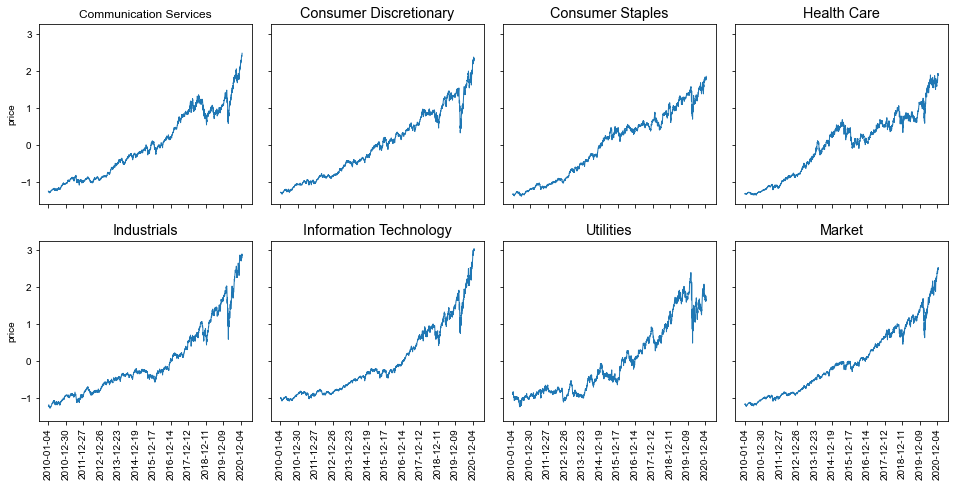

In [23]:
fig, axes=plt.subplots(2,4,figsize=(15, 7),sharex=True, sharey=True)
length=df_price_sector.shape
for i in range(length[1]-1):
    sns.lineplot(data=df_price_sector, x=range(length[0]), y=df_price_sector.columns[i+1],linewidth=1,ax=axes[int(i/4),i%4]).set(title=df_price_sector.columns[i+1], ylabel='price')
    axes[int(i/4),i%4].set_xticks(np.array(np.arange(0, length[0], step=250)))
    axes[int(i/4),i%4].set_xticklabels(df_price_sector['Date'].iloc[np.arange(0, length[0], step=250)],rotation = 90)
    sns.set(font_scale=1.2)
    sns.set_style("whitegrid",{'grid.linestyle':'--'})
fig.tight_layout(rect=[0, 0, .9, 1])
plt.show()

#### Pair plots of features
With filtered dataset, we can use pair plots to visualize the target and feature-target relationships

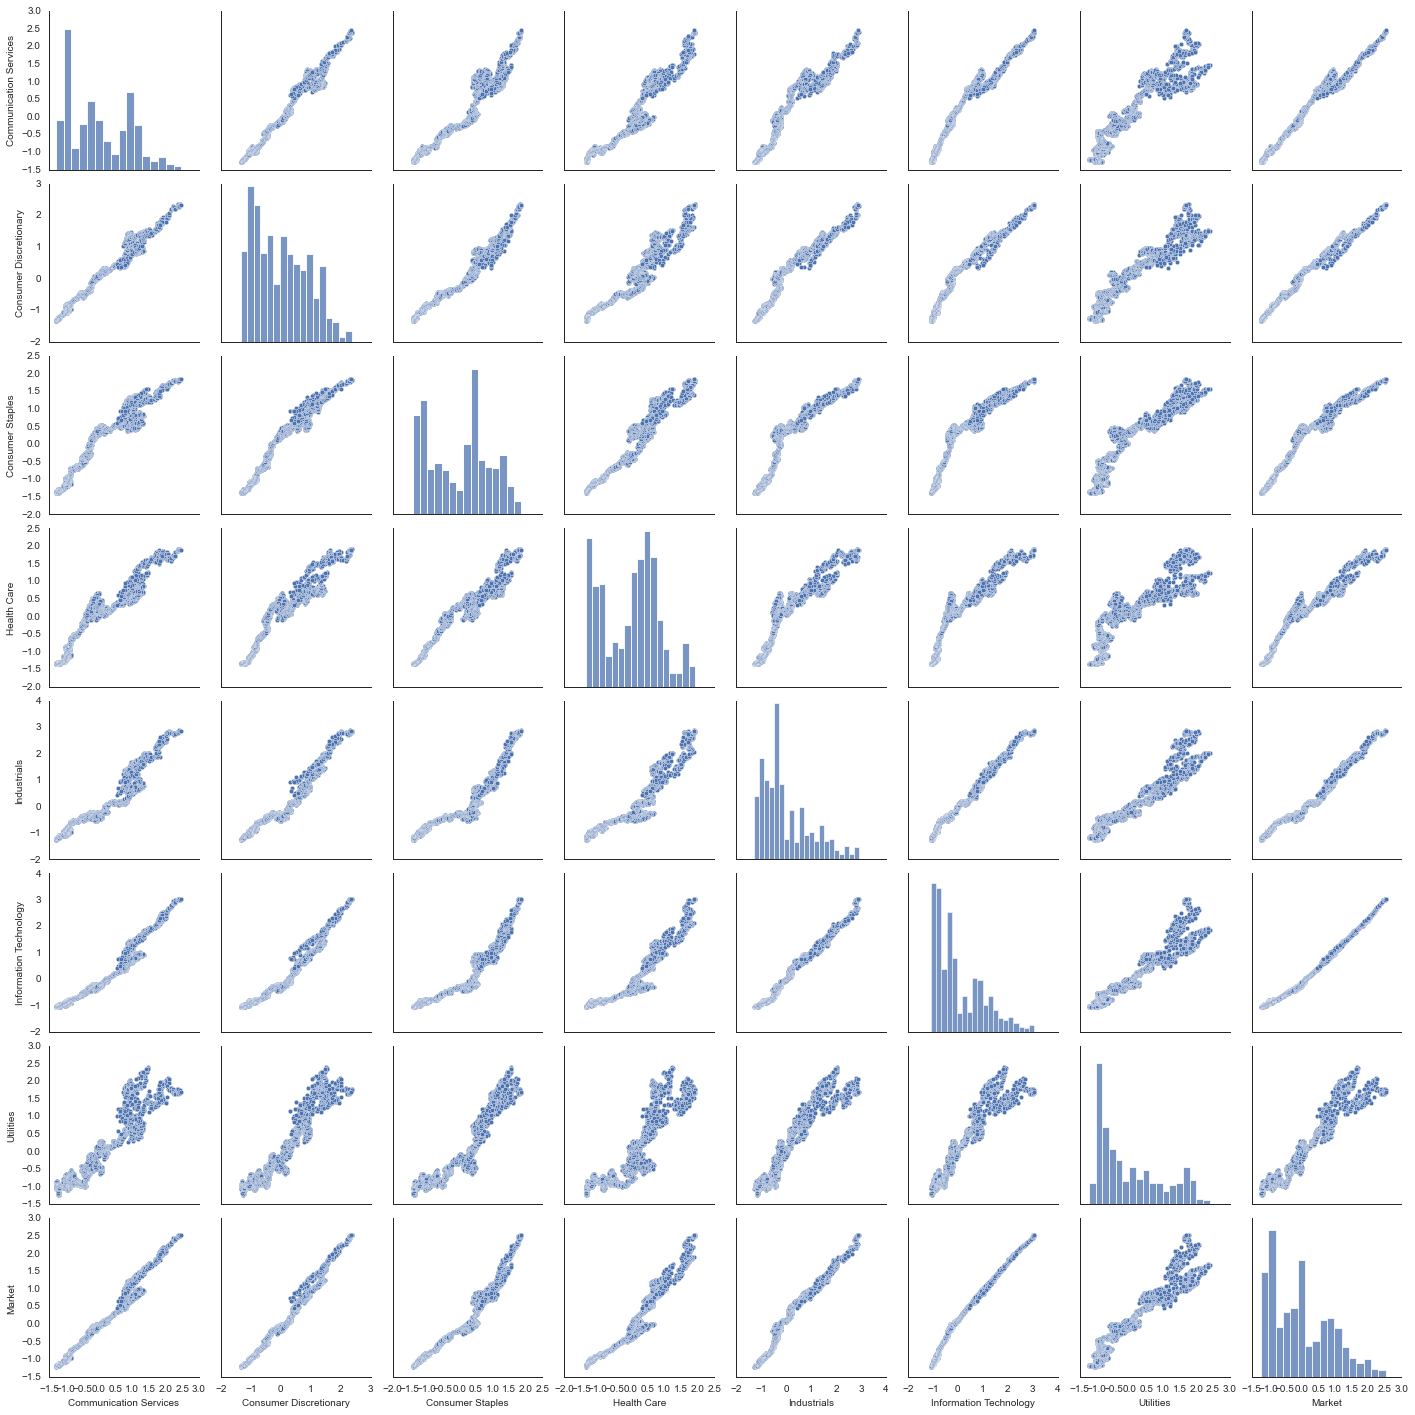

In [168]:
sns.set_style("white")
sns.pairplot(df_price_sector)

#### Correlation features

<ipython-input-172-bccae60dd9c6>:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


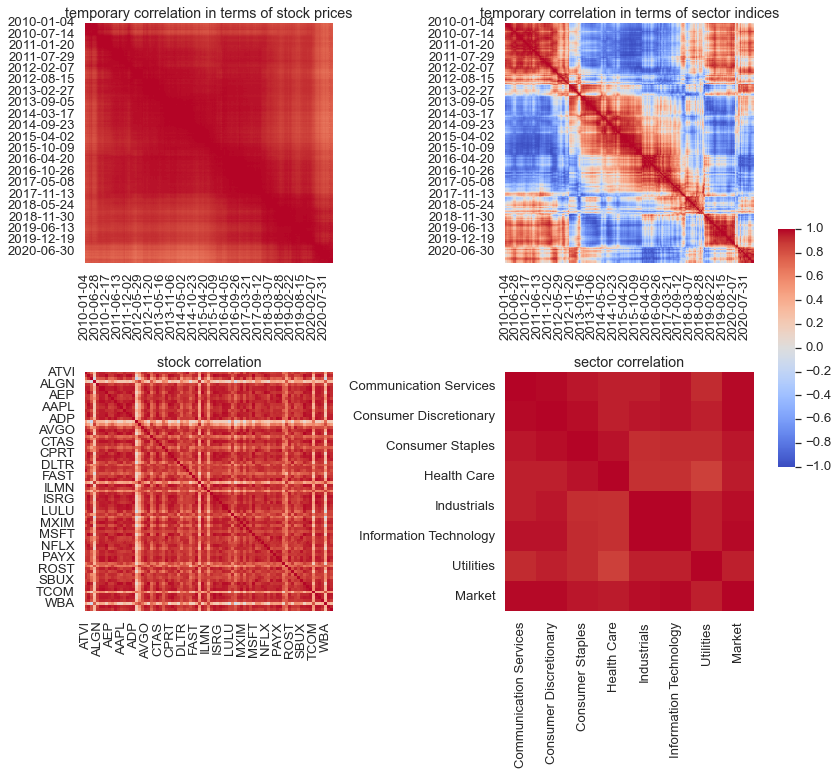

In [172]:
fig,axes = plt.subplots(2,2,figsize=(12, 11))
cbar_ax = fig.add_axes([.91,.4,.02,.3])
sns.heatmap(df_price.T.corr(),cmap="coolwarm", vmin=-1, vmax=1, cbar_ax = cbar_ax,ax=axes[0,0]).set(title='temporary correlation in terms of stock prices',ylabel='',xlabel='')
sns.heatmap(df_price_sector.set_index('Date').T.corr(),cmap="coolwarm", vmin=-1, vmax=1,cbar_ax = cbar_ax,ax=axes[0,1]).set(title='temporary correlation in terms of sector indices',ylabel='',xlabel='')
sns.heatmap(df_price.corr(),cmap="coolwarm", vmin=-1, vmax=1,cbar_ax = cbar_ax,ax=axes[1,0]).set(title='stock correlation',ylabel='',xlabel='')
sns.heatmap(df_price_sector.set_index('Date').corr(),cmap="coolwarm", vmin=-1, vmax=1,cbar_ax = cbar_ax,ax=axes[1,1]).set(title='sector correlation',ylabel='',xlabel='')
sns.set(font_scale=1.2)
fig.tight_layout(rect=[0, 0, .9, 1])
plt.show()

#### Separate our features from our target
We refer the scaled prices avearged over all tickers in each sector or the market as an index of that sector or the market. Thus, we further consider the indices of 7 sectors at day $t$ as the features, and the index of the market at day $t+1$ as the target. The target index reflects the trend of the whole market. If the target index is larger (smaller) than the previous one, there is a upward (downward) trend for the market. If the traget index is equal to the previous one, the market keeps stable. 

In [173]:
#Separate our features X from our target y
X = df_price_sector.loc[0:df_price_sector.shape[0]-2,['Communication Services','Consumer Discretionary','Consumer Staples',
                           'Health Care','Industrials','Information Technology','Utilities']]
y = df_price_sector.loc[1:df_price_sector.shape[0]-1,['Market']]
print(X.shape,y.shape)

(2767, 7) (2767, 1)


In [174]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Communication Services  2767 non-null   float64
 1   Consumer Discretionary  2767 non-null   float64
 2   Consumer Staples        2767 non-null   float64
 3   Health Care             2767 non-null   float64
 4   Industrials             2767 non-null   float64
 5   Information Technology  2767 non-null   float64
 6   Utilities               2767 non-null   float64
dtypes: float64(7)
memory usage: 151.4 KB


#### Basic feature engineering: adding polynomial and interaction terms by Scikit-Learn
we will add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [175]:
#Instantiate and provide desired degree; 
#Note: degree=2 also includes intercept, degree 1 terms, and cross-terms
pf = PolynomialFeatures(degree=2)
pf.fit(X)
features=X.columns.tolist()
X_array = pf.transform(X)
X_pf=pd.DataFrame(X_array, columns = pf.get_feature_names(input_features=features))
X_pf.head()

,1,Communication Services,Consumer Discretionary,Consumer Staples,Health Care,Industrials,Information Technology,Utilities,Communication Services^2,Communication Services Consumer Discretionary,...,Health Care^2,Health Care Industrials,Health Care Information Technology,Health Care Utilities,Industrials^2,Industrials Information Technology,Industrials Utilities,Information Technology^2,Information Technology Utilities,Utilities^2
0,1.0,-1.254160,-1.290937,-1.343075,-1.330187,-1.216274,-0.987269,-0.866710,1.572916,1.619040,...,1.769397,1.617871,1.313252,1.152886,1.479321,1.200790,1.054157,0.974701,0.855676,0.751187
1,1.0,-1.252664,-1.282067,-1.333377,-1.326515,-1.204676,-0.985700,-0.899193,1.569168,1.606000,...,1.759643,1.598022,1.307546,1.192794,1.451245,1.187449,1.083237,0.971604,0.886335,0.808549
2,1.0,-1.259577,-1.283297,-1.332764,-1.321205,-1.188785,-0.987211,-0.886030,1.586534,1.616411,...,1.745583,1.570629,1.304309,1.170627,1.413211,1.173582,1.053299,0.974586,0.874699,0.785049
3,1.0,-1.265850,-1.287723,-1.334777,-1.321150,-1.182965,-0.991318,-0.879263,1.602376,1.630064,...,1.745438,1.562875,1.309680,1.161638,1.399407,1.172695,1.040137,0.982712,0.871629,0.773103
4,1.0,-1.266347,-1.288551,-1.335954,-1.321156,-1.176720,-0.984471,-0.881933,1.603635,1.631753,...,1.745452,1.554630,1.300639,1.165170,1.384670,1.158446,1.037788,0.969183,0.868237,0.777805


## Models  <a name="model"></a>

The training uses three linear regression models which covers using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, and the same cross-validation method.

In [440]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import math 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

In [238]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [146]:
s = StandardScaler()
lr = LinearRegression()

### Model 1: a simple linear regression

In [424]:
# training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=72018)

In [425]:
# Fit StandardScaler on X_train
X_train_s = s.fit_transform(X_train)
# Fit regression
lr.fit(X_train_s, y_train)
# Transform testing data
X_test_s = s.transform(X_test)
# Predict on testing data
y_pred = lr.predict(X_test_s)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('R^2 is %.4f, mean squared error is %.4f' % (r2,mse))

R^2 is 0.9994, mean squared error is 0.0005


In [426]:
# Combine multiple processing steps into a Pipeline
estimator = Pipeline([("scaler", s),("regression", lr)])
# The KFold object in SciKit Learn tells the cross validation object how to split up the data
kf = KFold(shuffle=True, random_state=72018, n_splits=10)
pred_lr = cross_val_predict(estimator, X, y, cv=kf)
r2_lr=r2_score(y, pred_lr)
mse_lr=mean_squared_error(y,pred_lr)
print('R^2 score is %.4f, mean squared error is %.4f' % (r2_lr,mse_lr))

R^2 score is 0.9992, mean squared error is 0.0007


### Model 2: a polynomial regression

In [427]:
scores=[]
for deg in range(1,5):
    pf = PolynomialFeatures(degree=deg, include_bias=True)
    # Combine multiple processing steps into a Pipeline
    estimator = Pipeline([
            ("scaler", s),
            ("make_higher_degree", pf),
            ("regression", lr)])
    # The KFold object in SciKit Learn tells the cross validation object how to split up the data
    kf = KFold(shuffle=True, random_state=72018, n_splits=3)
    predictions = cross_val_predict(estimator, X, y, cv=kf)
    r2_score(y, predictions)
    score=r2_score(y,predictions)
    scores.append(score)

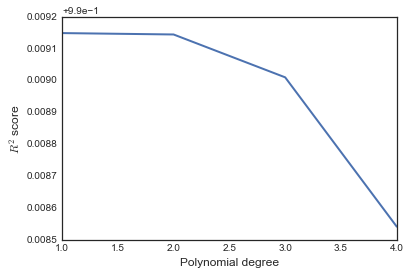

In [428]:
fig, ax = plt.subplots()
ax.plot(range(1,5),scores, 'b-', lw=2)
ax.set_xlabel('Polynomial degree')
ax.set_ylabel('$R^2$ score')
plt.show()

In [429]:
print('When polynomial degree={}, the maximal R squared score is {}'
      .format(scores.index(max(scores))+1,max(scores)))

When polynomial degree=1, the maximal R squared score is 0.9991483003473285


In [430]:
pf = PolynomialFeatures(degree=scores.index(max(scores))+1, include_bias=True)
# Combine multiple processing steps into a Pipelin
estimator = Pipeline([
            ("scaler", s),
            ("make_higher_degree", pf),
            ("regression", lr)])
# The KFold object in SciKit Learn tells the cross validation object how to split up the data
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
pred_pf = cross_val_predict(estimator, X, y, cv=kf)
r2_pf=r2_score(y, pred_pf)
mse_pf=mean_squared_error(y,pred_pf)
print('R^2 score is %.4f, mean squared error is %.4f' % (r2_pf,mse_pf))

R^2 score is 0.9991, mean squared error is 0.0007


### Model 3: a LASSO regression
A regularization regression with LASSO’s feature selection

In [450]:
pf = PolynomialFeatures(degree=3)
scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)  
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])
    predictions = cross_val_predict(estimator, X, y, cv = kf)    
    score = r2_score(y, predictions)
    scores.append(score)  

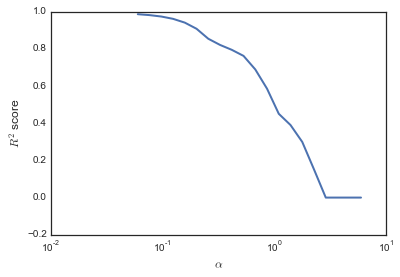

In [451]:
fig, ax = plt.subplots()
plt.semilogx(alphas, scores,'b-', lw=2);
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$R^2$ score')
plt.show()

In [452]:
print('When alpha={}, the maximal R squared score is {}'
      .format(alphas[scores.index(max(scores))],max(scores)))

When alpha=0.06, the maximal R squared score is 0.9856627372710167


In [453]:
pf = PolynomialFeatures(degree=3)
las = Lasso(alpha=alphas[scores.index(max(scores))], max_iter=100000)  
estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])
pred_las = cross_val_predict(estimator, X, y, cv = kf)    
r2_las = r2_score(y, pred_las)
mse_las=mean_squared_error(y,pred_las)
print('R^2 score is %.4f, mean squared error is %.4f' % (r2_las,mse_las))

R^2 score is 0.9857, mean squared error is 0.0116


### Model 4: a Ridge regression
A regularization regression with Ridge’s feature selection

In [456]:
pf = PolynomialFeatures(degree=3)
alphas = np.geomspace(0.06, 6.0, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])
    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

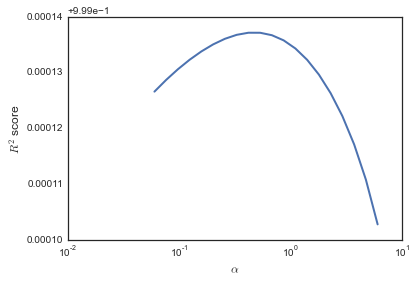

In [457]:
fig, ax = plt.subplots()
plt.semilogx(alphas, scores,'b-', lw=2);
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$R^2$ score')
plt.show()

In [458]:
print('When alpha={}, the maximal R squared score is {}'
      .format(alphas[scores.index(max(scores))],max(scores)))

When alpha=0.4171156777065363, the maximal R squared score is 0.9991370955953583


In [459]:
pf = PolynomialFeatures(degree=3)
ridge = Ridge(alpha=alphas[scores.index(max(scores))], max_iter=100000)  
estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("ridge_regression", ridge)])
pred_rdg = cross_val_predict(estimator, X, y, cv = kf)    
r2_rdg = r2_score(y, pred_rdg)
mse_rdg=mean_squared_error(y,pred_rdg)
print('R^2 score is %.4f, mean squared error is %.4f' % (r2_rdg,mse_rdg))

R^2 score is 0.9991, mean squared error is 0.0007


### Model 5: an Elastic Net regression
A regularization regression with Elastic Net’s feature selection

In [470]:
pf = PolynomialFeatures(degree=3)
l1_ratios = np.geomspace(0.06, 6.0, 20)
scores=[]
for l1_ratio in l1_ratios:
    elasticnet  = ElasticNet(alpha=1, l1_ratio=l1_ratio, max_iter=100000)
    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ElasticNet_regression", elasticnet)])
    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

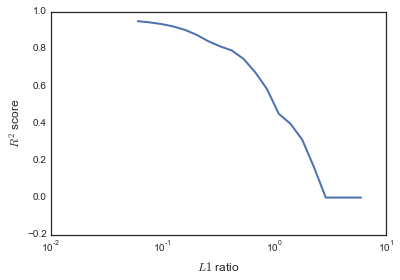

In [471]:
fig, ax = plt.subplots()
plt.semilogx(l1_ratios, scores,'b-', lw=2);
ax.set_xlabel('$L1$ ratio')
ax.set_ylabel('$R^2$ score')
plt.show()

In [472]:
print('When L1 ratio={}, the maximal R squared score is {}'
      .format(l1_ratios[scores.index(max(scores))],max(scores)))

When L1 ratio=0.06, the maximal R squared score is 0.9481015430132176


In [474]:
pf = PolynomialFeatures(degree=3)
elasticnet  = ElasticNet(alpha=1, l1_ratio=l1_ratios[scores.index(max(scores))], max_iter=100000)
estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ElasticNet_regression", elasticnet)])
pred_en = cross_val_predict(estimator, X, y, cv = kf)    
r2_en = r2_score(y, pred_en)
mse_en=mean_squared_error(y,pred_en)
print('R^2 score is %.4f, mean squared error is %.4f' % (r2_en,mse_en))

R^2 score is 0.9481, mean squared error is 0.0421


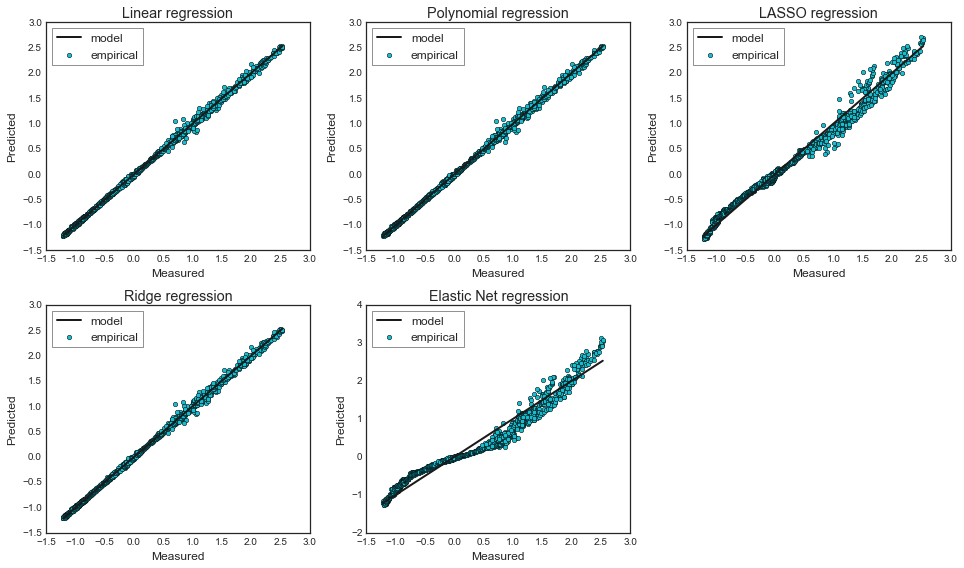

In [514]:
fig, ax = plt.subplots(2,3,figsize=(15, 8))
predictions=[pred_lr,pred_pf,pred_las,pred_rdg,pred_en]
tit=['Linear regression','Polynomial regression','LASSO regression','Ridge regression','Elastic Net regression']
fig.delaxes(ax[1,2])
for i in range(5):
    ax[int(i/3),i%3].scatter(y, predictions[i], edgecolors=(0, 0, 0),c='#17becf',label='empirical')
    ax[int(i/3),i%3].plot([y.min(), y.max()], [y.min(), y.max()], 'k-', lw=2,label='model')
    ax[int(i/3),i%3].set(xlabel='Measured',ylabel='Predicted',title=tit[i])
    ax[int(i/3),i%3].legend(framealpha=1, frameon=True, loc='upper left')
fig.tight_layout(rect=[0, 0, .9, 1])
plt.show()

In [519]:
r2=[r2_lr,r2_pf,r2_las,r2_rdg,r2_en]
mse=[mse_lr,mse_pf,mse_las,mse_rdg,mse_en]
tab=pd.DataFrame({'R squared score':r2,'Mean squared error':mse},columns=['R squared score','Mean squared error'])
tab

,R squared score,Mean squared error
0,0.999157,0.000684
1,0.999148,0.000692
2,0.985663,0.011642
3,0.999137,0.000701
4,0.948102,0.042141


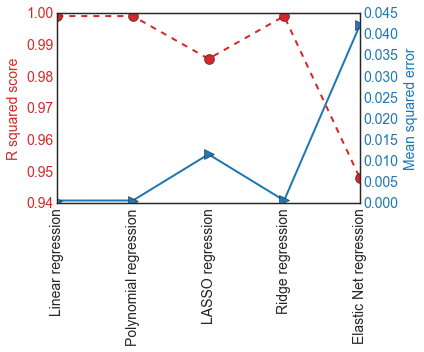

In [569]:
fig, ax1 = plt.subplots(figsize=(6,5))
color = 'tab:red'
ax1.set_ylabel('R squared score', color=color,fontsize=14)
ax1.plot(range(5), r2, 'o--',color=color, label='R squared score', linewidth=2, markersize=10)
ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
ax1.set_xticks(range(5))
ax1.set_xticklabels(tit,rotation=90,fontsize=14)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean squared error', color=color,fontsize=14)  # we already handled the x-label with ax1
ax2.plot(range(5), mse, '>-',color=color, label='Mean squared error', linewidth=2, markersize=10)
ax2.tick_params(axis='y', labelcolor=color, labelsize=14)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Results and Discussion <a name="results"></a>
By comparison, the linear regression has the highest $R^2$ score and the lowest mean squared error. Therefore, it is better to fit our data and predict the market index with a higher accuracy. The highest $R^2$ score from the linear regression suggests there is a linear relationship between the market index and each sector price.

The results from polynormial regression and the Ridge regression are close to the results from the linear regression, where the best polynormial degree is 1 so that the polynormial regression is symplified to a simple linear regression. The best $\alpha$ in the Ridge regression is 0.42, which results in a high $R^2$ score 0.9991. 

## Summary  <a name="summary"></a>

<ol>
    <li> Each sector presents strongly positive correlations with the market and with the other sectors.
    <li> There are strong correlations in time shown in the diagonal blocks in the temporial correlation in terms of sector indices. 
    <li> By comparing with different regression models, the simple linear regression can predict the future market indices with a high accuracy. It also suggests that the market indices presents a linear relationship with the sector indices. 
</ol>



## Suggestions for next steps in analyzing this data <a name="suggestion"></a>

<ol>
    <li> Add more features to the data
    <li> Find out the market trends by predicting the returns of the market
    <li> Analyze the spectrum information of the correlation matrix 
    <li> Analyze the time-laggged correlation among stocks
</ol>